In [1]:
import pandas as pd

In [2]:
covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')

In [3]:
covid.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [4]:
covid.info()
covid.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  126 non-null    object 
 1   Country/Region  276 non-null    object 
 2   Last Update     276 non-null    object 
 3   Confirmed       276 non-null    int64  
 4   Deaths          276 non-null    int64  
 5   Recovered       276 non-null    int64  
 6   Latitude        276 non-null    float64
 7   Longitude       276 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.4+ KB


Province/State    150
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64

In [6]:
covid['Active'] = covid['Confirmed']-covid['Deaths']-covid['Recovered']
result = covid.groupby('Country/Region')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
print(result)

                     Country/Region  Confirmed  Deaths  Recovered  Active
0                       Afghanistan         22       0          1      21
1                           Albania         55       1          0      54
2                           Algeria         60       4         12      44
3                           Andorra         39       0          1      38
4               Antigua and Barbuda          1       0          0       1
..                              ...        ...     ...        ...     ...
154                         Uruguay         29       0          0      29
155                      Uzbekistan         10       0          0      10
156                       Venezuela         33       0          0      33
157                         Vietnam         66       0         16      50
158  occupied Palestinian territory          0       0          0       0

[159 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [9]:
latest = covid.groupby(['Country/Region','Province/State'])['Confirmed','Deaths','Recovered'].max()
pd.set_option('display.max_rows', None)
print(latest)

                                             Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     210       4          4
               Northern Territory                    1       0          0
               Queensland                           78       0          8
               South Australia                      29       0          3
               Tasmania                              7       0          0
               Victoria                             94       0          8
               Western Australia                    31       1          0
Canada         Alberta                              74       0          0
               British Columbia                    103       4          4
               Grand Princess         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [10]:
China = covid[covid['Country/Region'] == 'China']
China = China[['Province/State','Confirmed','Deaths','Recovered']]
result = China.sort_values(by='Confirmed', ascending=False)
result = result.reset_index(drop=True)
print(result)

    Province/State  Confirmed  Deaths  Recovered
0            Hubei      67799    3111      56003
1        Guangdong       1364       8       1307
2            Henan       1273      22       1250
3         Zhejiang       1232       1       1216
4            Hunan       1018       4       1014
5            Anhui        990       6        984
6          Jiangxi        935       1        934
7         Shandong        761       7        746
8          Jiangsu        631       0        631
9        Chongqing        576       6        570
10         Sichuan        540       3        520
11    Heilongjiang        482      13        456
12         Beijing        456       8        369
13        Shanghai        358       3        325
14           Hebei        318       6        310
15          Fujian        296       1        295
16         Guangxi        253       2        248
17         Shaanxi        246       3        236
18          Yunnan        176       2        172
19          Hainan  

In [13]:
Deaths = covid.groupby('Country/Region')['Deaths'].max()
Deaths = Deaths.sort_values(ascending=False)
print(Deaths)

Country/Region
China                               3111
Italy                               2503
Iran                                 988
Spain                                533
France                               148
Korea, South                          81
United Kingdom                        55
US                                    55
Netherlands                           43
Japan                                 29
Switzerland                           27
Germany                               24
Philippines                           12
Iraq                                  11
Belgium                               10
Sweden                                 7
San Marino                             7
Cruise Ship                            7
Greece                                 5
Indonesia                              5
Poland                                 5
Algeria                                4
Canada                                 4
Australia                              4
E

In [14]:
data = covid.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Recovered']==0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
print(result)

                       Country/Region  Confirmed  Deaths  Recovered
1                             Albania         55       1          0
4                 Antigua and Barbuda          1       0          0
7                               Aruba          3       0          0
13                           Barbados          2       0          0
16                              Benin          1       0          0
17                             Bhutan          1       0          0
18                            Bolivia         11       0          0
21                             Brunei         56       0          0
22                           Bulgaria         67       2          0
23                       Burkina Faso         15       0          0
25                           Cameroon         10       0          0
27           Central African Republic          1       0          0
28                              Chile        201       0          0
31                Congo (Brazzaville)          1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [16]:
data = covid.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Confirmed']==data['Deaths']]
result = result[['Country/Region', 'Confirmed', 'Deaths']]
result = result.sort_values('Confirmed', ascending=False)
result = result[result['Confirmed']>0]
result = result.reset_index(drop=True)
print(result)

  Country/Region  Confirmed  Deaths
0          Sudan          1       1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
data = covid.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
result = data[data['Confirmed'] == data['Recovered']]
result = result[['Country/Region','Confirmed','Recovered']]
result=  result.sort_values('Confirmed',ascending= False)
result = result[result['Confirmed']>0]
result = result.reset_index(drop=True)
print(result)

  Country/Region  Confirmed  Recovered
0          Nepal          1          1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [18]:
data = covid.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
result = data.sort_values('Confirmed',ascending=False).head(10)
result = result.reset_index(drop=True)
print(result)

   Country/Region  Confirmed  Deaths  Recovered
0           China      81058    3230      68798
1           Italy      31506    2503       2941
2            Iran      16169     988       5389
3           Spain      11748     533       1028
4         Germany       9257      24         67
5    Korea, South       8320      81       1407
6          France       7683     148         12
7              US       6421     108         17
8     Switzerland       2700      27          4
9  United Kingdom       1960      56         53


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


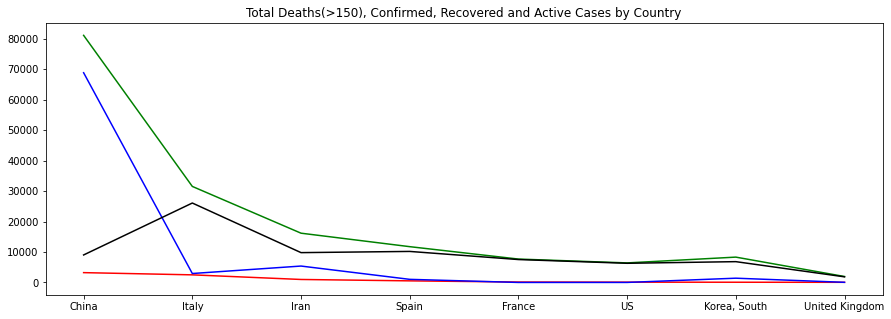

In [20]:
import matplotlib.pyplot as plt
r_data = covid.groupby('Country/Region')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
r_data = r_data.sort_values('Deaths', ascending=False)
r_data = r_data[r_data['Deaths']>50]
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country/Region'], r_data['Deaths'],color='red')
plt.plot(r_data['Country/Region'], r_data['Confirmed'],color='green')
plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue')
plt.plot(r_data['Country/Region'], r_data['Active'], color='black')
 
plt.title('Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')
plt.show()

In [22]:
import plotly.express as px
us_data = covid[covid['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province/State'])['Deaths'].sum().reset_index()
us_data_death = us_data[us_data['Deaths'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()

In [23]:
us_data = covid[covid['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
 
us_data = us_data.groupby(['Province/State'])['Active'].sum().reset_index()
us_data_death = us_data[us_data['Active'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Active', title='State wise recovery cases of COVID-19 in USA', text='Active')
state_fig.show()

In [24]:
combine_us_data = covid[covid['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
combine_us_data = combine_us_data[combine_us_data.sum(axis = 1) > 0]
combine_us_data = combine_us_data.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
combine_us_data = pd.melt(combine_us_data, id_vars='Province/State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig = px.bar(combine_us_data, x='Province/State', y='Count', text='Count', barmode='group', color='Case', title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [25]:
import plotly.io as pio
pio.templates.default = "plotly_dark"
grouped = covid.groupby('Last Update')['Last Update', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouped, x="Last Update", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

